# <center><div class="alert alert-info">IRIS DATASET ANALYSIS - CLASSIFICATION</div>
<center>By - Jitendra Girish Patil

## Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

class:
-- Iris Setosa -- Iris Versicolour -- Iris Virginica

## <center><div class="alert alert-info">IMPORTING LIBRARIES</div>

In [1]:
import pandas as pd                   # to work with dataframes
import numpy as np                    # to work with numpy arrays
import matplotlib.pyplot as plt       # for visualisation 
import seaborn as sns                 # for visualisation
import warnings
warnings.filterwarnings('ignore')

## <center><div class="alert alert-info">IMPORTING THE DATA</div>

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## <center><div class="alert alert-info">DATA EXPLORATION</div>

### PROFILING

In [4]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# checking the shape 
df.shape

(150, 5)

In [6]:
# checking the size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# checking description
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# checking values
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## <center><div class="alert alert-info">EXPLORATORY DATA ANALYSIS</div>

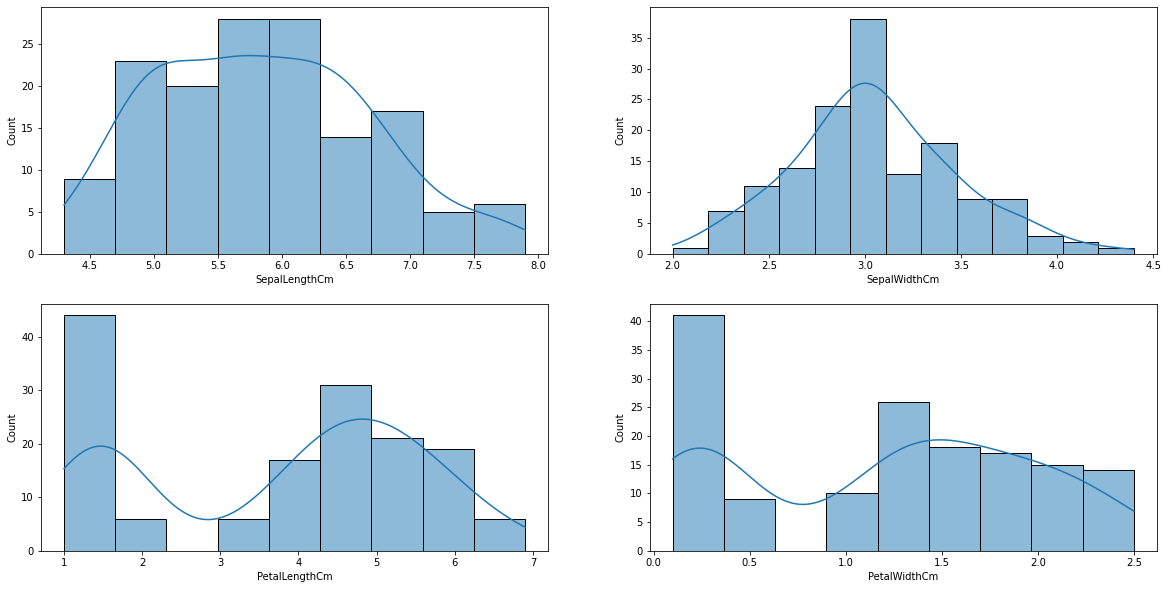

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt.subplot(221)
sns.histplot(df['SepalLengthCm'],kde=True)

plt.subplot(222)
sns.histplot(df['SepalWidthCm'],kde=True)

plt.subplot(223)
sns.histplot(df['PetalLengthCm'],kde=True)

plt.subplot(224)
sns.histplot(df['PetalWidthCm'],kde=True)
plt.show()

### <div class="alert alert-success">Interpretation</div>

- For Sepal Length, the data is distributed between 5.0 to 6.5 with count over 20 which means most of the sepal length is between this range.
- For Sepal Width, the data is normally distributed.
- For Petal Length, the data is distributed between 4.0 to 6.5 with count over 25 which means most of the petal length is between this range.
- For Petal Width, the data is distributed between 1.2 to 2.0 with count over 20 which means most of the petal width is between this range.

In [10]:
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

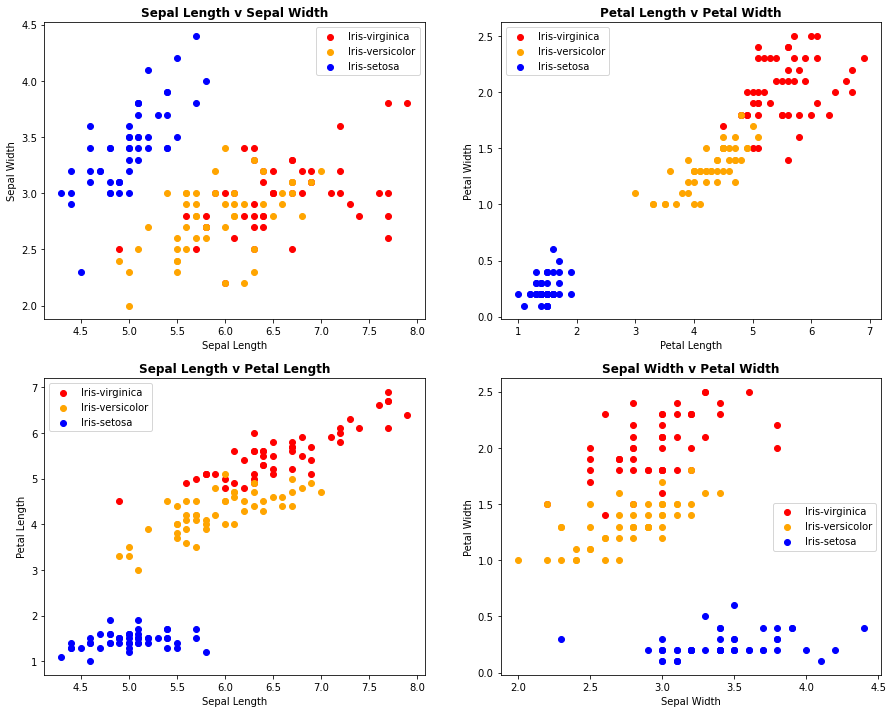

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

plt.subplot(221)
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.title('Sepal Length v Sepal Width',size=12,fontweight='bold')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.subplot(222)
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.title('Petal Length v Petal Width',size=12,fontweight='bold')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.subplot(223)
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.title('Sepal Length v Petal Length',size=12,fontweight='bold')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

plt.subplot(224)
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.title('Sepal Width v Petal Width',size=12,fontweight='bold')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

### <div class="alert alert-success">Interpretation</div>

### Above we can see the distribution of various classes among different criterias of petal and sepal length and width.

## <center><div class="alert alert-info">DATA PREPROCESSING</div>

In [12]:
# checking null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Feature Selection

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


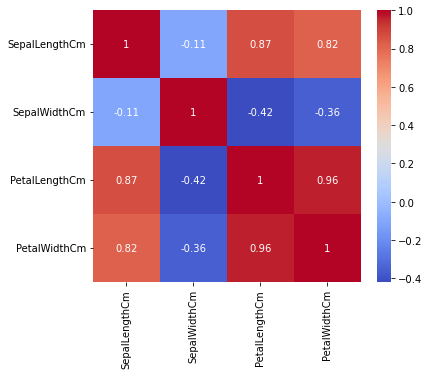

In [14]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot=True, ax=ax, cmap='coolwarm')
plt.show()

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## <center><div class="alert alert-info">MODEL TRAINING</div>

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x = df.drop(['Species'], axis=1)
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
# Importing libraries and training the model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression().fit(x_train, y_train)

# Predicting the values
y_pred = lr_model.predict(x_test)
print('Prediction is : \n',y_pred)

Prediction is : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [21]:
# Score of Training Dataset
lr_model.score(x_train,y_train)

0.975

In [22]:
# Score of Testing Dataset
lr_model.score(x_test,y_test)

1.0

In [18]:
from sklearn.metrics import classification_report
print('Classification Report : \n', classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



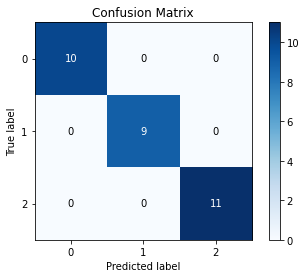

In [28]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

### <div class="alert alert-success">Interpretation</div>

- As the data set is small, Logistic Regression is the best preferred model for Classification.
- The Accuracy and the F1 score of the model shows 100% accurate results.
- We can observe from above Confusion Matrix the accuracy of the model.
- The model is neither Underfitting nor Overfitting.